# NYU CUSP: Applied Data Science, Network Analysis module, session 1
# Network visualization and basic analysis

In the lecture we reviewed importance of the network science for urban data analytics, the concept of the network and its representations (graph, adjacency matrix, edge list) as well as metrics to quantify node importance in the network (centrality), such as:
* Degree 
(how many direct connection the nodes)
* Closeness centrality
(how close is the node to all other nodes in network topology, how central it is)
* Betweenness centrality
(how much of a bridge is the node, how many routes will get disrupted if it fails)
* Pagerank centrality
(chances for the network random walker (with teleport) to be seen in the node at a random moment)

Python has a convenient module for network analysis - networkx. 

Start exploring it from creating and visualizing networks

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
#make sure plots are embedded into the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


first let's explore the data structure for the network provided by networkx

In [2]:
#create an empty undirected network
G=nx.Graph()
#add a node
G.add_node(1)
#add several nodes
G.add_nodes_from([2,3,4])
#we can add not only numbers but also text (or any other python object) as a node 
G.add_node('A')
#now add an edge
G.add_edge(1,2)
#and a set of edges
G.add_edges_from([(1,3),(1,4),(3,4),('A',3),('A',4)])

In [3]:
#now let's see what we've done
print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 'A']
[(1, 2), (1, 3), (1, 4), (3, 4), (3, 'A'), (4, 'A')]


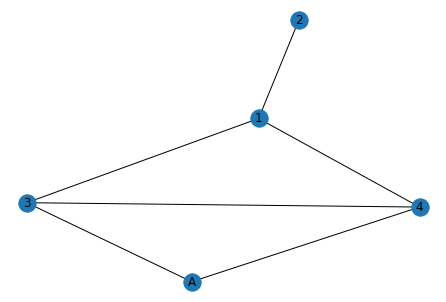

In [4]:
np.random.seed(2011) #fix the origin of random generator - see below why
#now let's visualize, which turns out to be fairly simple with networkx
nx.draw(G,with_labels=True)

note that the locations are selected by random - this is why we fixed random generator to make sure appearance is always the same. But what if we have the locations of the nodes we want the python to stick to?

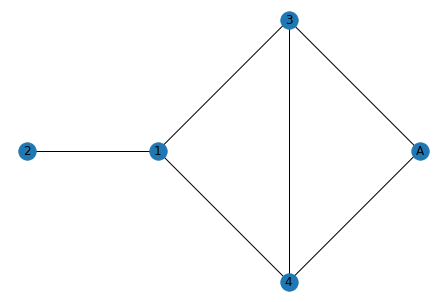

In [5]:
#set up the location for our nodes
pos={1:(50,50),2:(25,50),3:(75,75),4:(75,25),'A':(100,50)}
#visualize for fixed node locations
nx.draw(G,pos=pos,with_labels=True)

But networkx does not only allow to store and visualize the networks. It can also perform a lot of useful computations for us, including some network properties. Let's do node degrees for example

In [6]:
dict(G.degree())

{1: 3, 2: 1, 3: 3, 4: 3, 'A': 2}

In [7]:
list(dict(G.degree()).values())

[3, 1, 3, 3, 2]

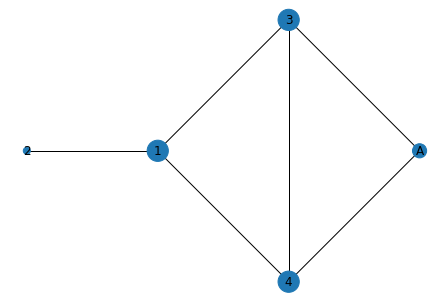

In [8]:
#let's now use node degrees as sizes of the nodes visualized
nx.draw(G,pos=pos,node_size=50*np.array(list(dict(G.degree()).values()))**2,with_labels=True)

networkx can also handle directed networks as well

In [9]:
G2=nx.DiGraph() #create a directed graph
#add same edges as before; notice that when we add edges nodes are added automatically
G2.add_edges_from([(1,2),(1,3),(1,4),(3,4),(4,3),('A',3),('A',4)]) 

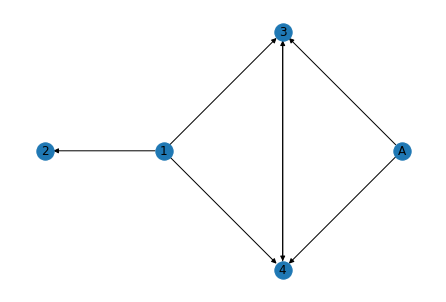

In [10]:
#visualize the network showing directions
nx.draw(G2,pos=pos,with_labels=True,arrows=True)

In [11]:
#calculate incoming and outgoing degrees
print(G2.in_degree())
print(G2.out_degree())

[(1, 0), (2, 1), (3, 3), (4, 3), ('A', 0)]
[(1, 3), (2, 0), (3, 1), (4, 1), ('A', 2)]


we can also handle a weighted network

In [12]:
G3=nx.DiGraph() #create a directed graph
#add same edges as before but with weights
G3.add_weighted_edges_from([(1,2,2),(1,3,2),(1,4,2),(3,4,1),('A',3,3),('A',4,3)])
#we can also add separate edges in the following way
G3.add_edge('A',1,weight=5)

In [13]:
#we can access all the edges outgoing from a node 'A' like
print(G3['A'])
#a specific edge like
G3['A'][1]['weight']=3
G3['A'][1]['distance']=3
print(G3['A'][1])
#and modify its properties like

{3: {'weight': 3}, 4: {'weight': 3}, 1: {'weight': 5}}
{'weight': 3, 'distance': 3}


In [14]:
print(G3['A'])

{3: {'weight': 3}, 4: {'weight': 3}, 1: {'weight': 3, 'distance': 3}}


In [15]:
G3.edges(data=False)

OutEdgeView([(1, 2), (1, 3), (1, 4), (3, 4), ('A', 3), ('A', 4), ('A', 1)])

In [16]:
#now let's extract all the edge weights into a list (in the same order as edges go)
w=[d['weight'] for (u,v,d) in G3.edges(data=True)]
print(w)

[2, 2, 2, 1, 3, 3, 3]


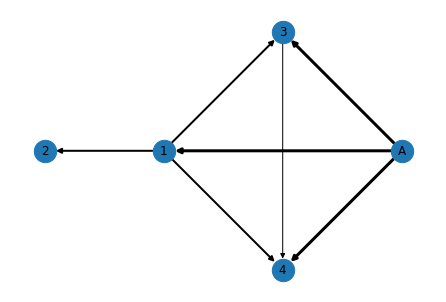

In [17]:
#and visualize the network using edge weights for the edge thikness
nx.draw(G3,pos=pos,with_labels=True,arrows=True,width=3*w,node_size=500)

### Excercise 1.
Visualize the star-like network with 6 nodes located around the circle and one in the center, being connected with the other 6 (all links directed from the center to the outer nodes). Center node should be marked as "C", while others - 1,2,3,4,5,6. Then try it with N=10 nodes

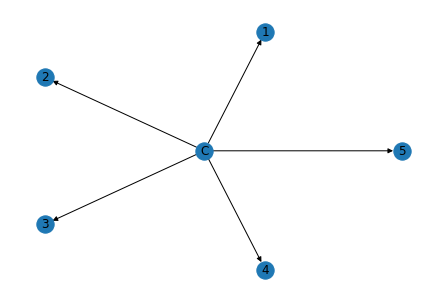

In [18]:
Star=nx.DiGraph()
#and a set of edges
N=6
Star.add_edges_from([('C',i) for i in range(1,N)])
StarPos={i:(np.cos(2*np.pi*i/(N-1)),np.sin(2*np.pi*i/(N-1))) for i in range(1,N)}
StarPos['C']=(0,0)
nx.draw(Star,with_labels=True,arrows=True,pos=StarPos)

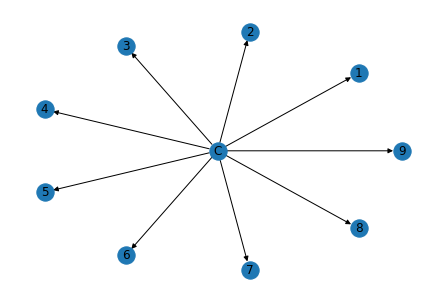

In [19]:
Star=nx.DiGraph()
#and a set of edges
N=10
Star.add_edges_from([('C',i) for i in range(1,N)])
StarPos={i:(np.cos(2*np.pi*i/(N-1)),np.sin(2*np.pi*i/(N-1))) for i in range(1,N)}
StarPos['C']=(0,0)
nx.draw(Star,with_labels=True,arrows=True,pos=StarPos)

## Network of air connections

Now we'll visualize a real-world network of the world airports with direct air connections. File citiesTable.csv is the table of airports together with their lat-long coordinates, while citiesToCities.csv contains the connection data

Source (before curation): https://openflights.org/data.html

In [20]:
import numpy as np
import pandas as pd

In [21]:
cities = pd.read_csv('citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [22]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [23]:
#create a dictionary of city locations
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

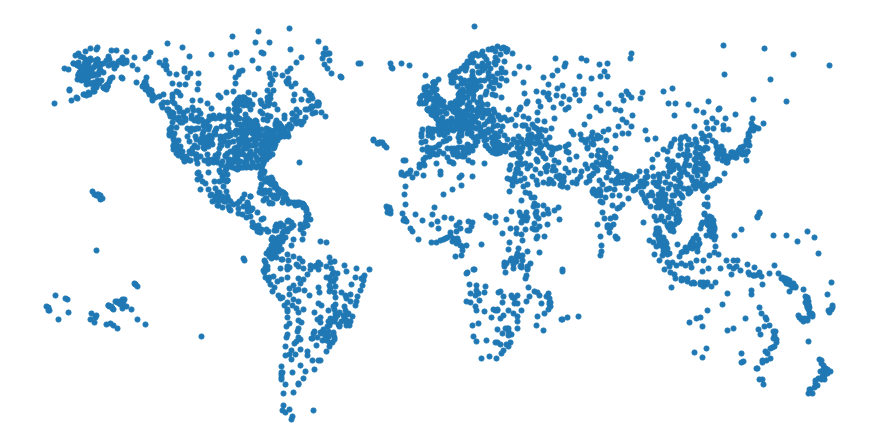

In [24]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=25)

In [25]:
#now read the links
links = pd.read_csv('citiesToCities.csv', index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [26]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]
edgelist

[('Sao Paulo', 'Rio De Janeiro'),
 ('Rio De Janeiro', 'Sao Paulo'),
 ('Beijing', 'Shanghai'),
 ('Johannesburg', 'Cape Town'),
 ('Honolulu', 'Tokyo'),
 ('Tokyo', 'Honolulu'),
 ('Tokyo', 'Seoul'),
 ('Seoul', 'Tokyo'),
 ('Tokyo', 'Los Angeles'),
 ('Los Angeles', 'Tokyo'),
 ('Shanghai', 'Beijing'),
 ('Hong Kong', 'Bangkok'),
 ('Bangkok', 'Hong Kong'),
 ('Taipei', 'Shanghai'),
 ('Shanghai', 'Taipei'),
 ('Cape Town', 'Johannesburg'),
 ('Kigali', 'Entebbe'),
 ('Shanghai', 'Hong Kong'),
 ('Hong Kong', 'Shanghai'),
 ('Muscat', 'Abu Dhabi'),
 ('New York', 'London'),
 ('Abu Dhabi', 'Muscat'),
 ('Shenzhen', 'Shanghai'),
 ('Shanghai', 'Shenzhen'),
 ('Taipei', 'Tokyo'),
 ('Tokyo', 'Taipei'),
 ('Sao Paulo', 'Belo Horizonte'),
 ('New York', 'Washington'),
 ('Washington', 'New York'),
 ('Qingdao', 'Shanghai'),
 ('Shanghai', 'Qingdao'),
 ('Shanghai', 'Chongqing'),
 ('Chongqing', 'Shanghai'),
 ('Singapore', 'Jakarta'),
 ('Jakarta', 'Singapore'),
 ('Sydney', 'Melbourne'),
 ('Beijing', 'Tokyo'),
 ('Tokyo',

In [27]:
#add edges to the network
Flights.add_edges_from(edgelist)

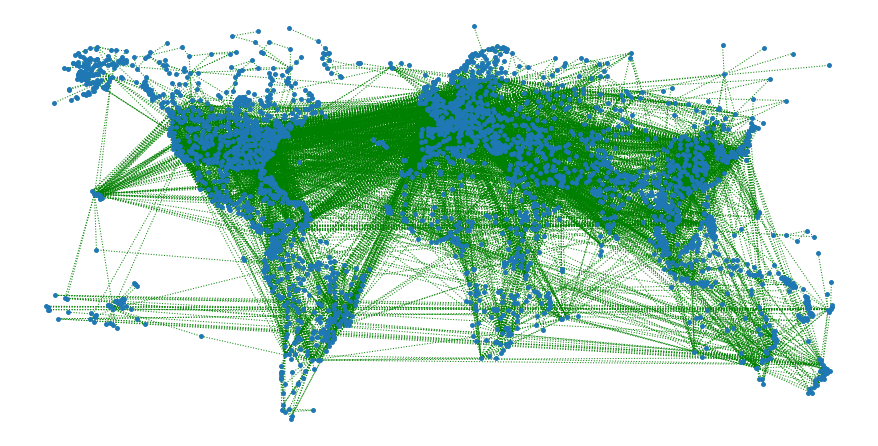

In [28]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [29]:
#most connected airport
AirportDeg=dict(Flights.degree())
TopAirport=list(AirportDeg.keys())[np.argmax(list(AirportDeg.values()))]
print('Most connected airport is {0} with {1} connections'.format(TopAirport,AirportDeg[TopAirport]))

Most connected airport is London with 311 connections


In [30]:
#least connected airport
LeastAirport=list(AirportDeg.keys())[np.argmin(list(AirportDeg.values()))]
print('Least connected airport is {0} with {1} connections'.format(LeastAirport,AirportDeg[LeastAirport]))

Least connected airport is Kashi with 1 connections


In [31]:
#compute network average number of connections per airport and network density
k_avg=mean(list(AirportDeg.values()))
dens=k_avg/(len(Flights)-1)
print('Average number of connections per airport is {0}; network density ={1}'.format(k_avg,dens))

Average number of connections per airport is 10.473895582329318; network density =0.003506493331881258


### Excercise 2. 
Create a list of top 20 most connected airports accross the world and visualize them among the rest using a larger size and different color for the top ones. Consider adding labels for the top airports

Hint: Feel free to use width=0 to eliminate edges on the plot. You may plot the entire graph first and then a subgraph (use .subgraph([list of nodes])) of top airports on top; alternatively can use list of sizes and colors but top nodes might be overlayed with others that way; use node_size and node_color to set up size and color of the nodes in draw(). 

In [32]:
Top20degree=sorted(AirportDeg.values(),reverse=True)[19]
TopNodes=[d for d in Flights if AirportDeg[d]>=Top20degree]

In [33]:
TopNodes

['London',
 'Chicago',
 'Paris',
 'Moscow',
 'Shanghai',
 'Beijing',
 'Denver',
 'New York',
 'Frankfurt',
 'Houston',
 'Newark',
 'Amsterdam',
 'Madrid',
 'Istanbul',
 'Atlanta',
 'Rome',
 'Munich',
 'Toronto',
 'Dubai',
 'Dallas-fort Worth']

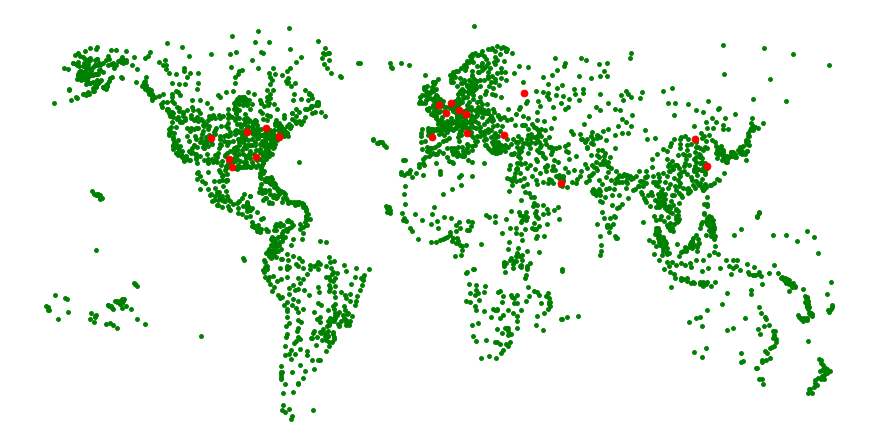

In [34]:
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Flights.subgraph(TopNodes),pos=CityPos,with_labels=False, width=0, node_size=45, node_color='red')

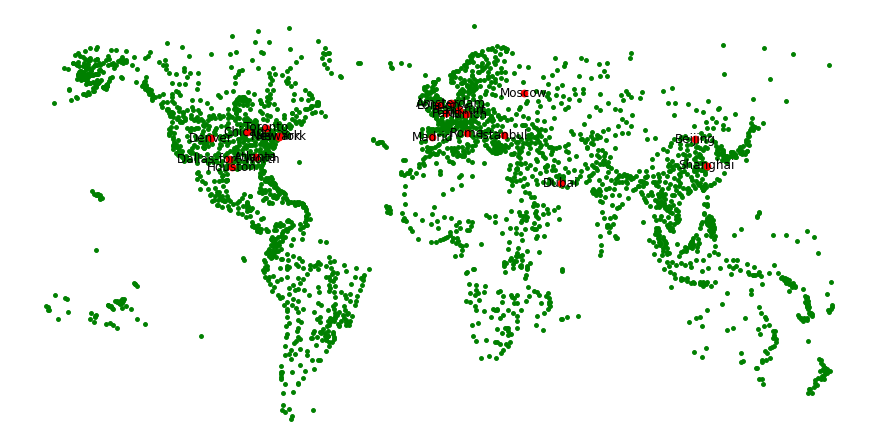

In [35]:
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Flights.subgraph(TopNodes),pos=CityPos,with_labels=True, width=0, node_size=45, node_color='red')

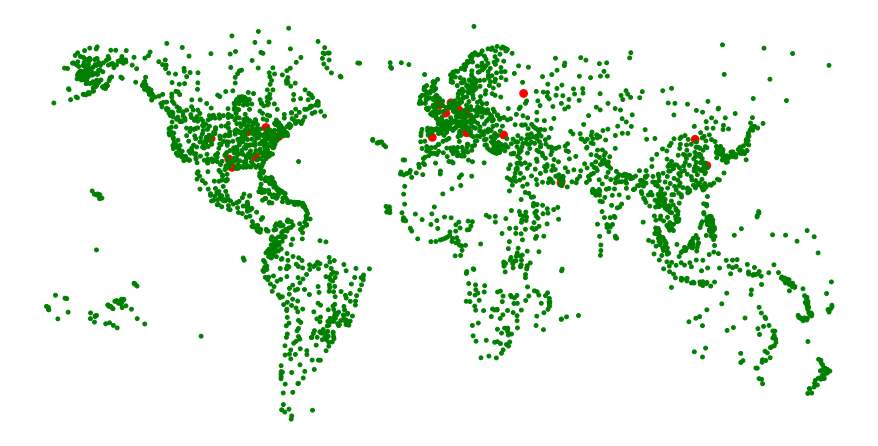

In [36]:
Top20degree=sorted(AirportDeg.values(),reverse=True)[19]
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0,
        node_size=[15+45*(AirportDeg[d]>=Top20degree) for d in Flights],
        node_color=['red' if (AirportDeg[d]>=Top20degree) else 'green' for d in Flights]);

### Excercise 3 (World airports). 
Find and visualize top 20 airports by pagerank centrality with alpha=0.85

In [37]:
pr = nx.pagerank(Flights, alpha=0.85)

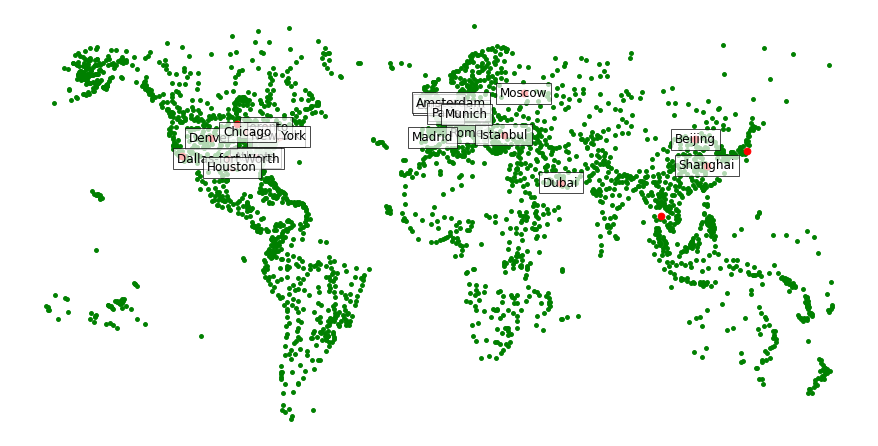

In [45]:
Top20pr=sorted(pr.values(),reverse=True)[19]
TopNodesPr=[d for d in Flights if pr[d]>=Top20pr]
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Flights.subgraph(TopNodesPr),pos=CityPos,with_labels=False, width=0, node_size=45, node_color='red')
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
_ = nx.draw_networkx_labels(Flights.subgraph(TopNodes),pos=CityPos,bbox=label_options)

In [40]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=df679a6663b4a919c67fbc61f5735335bff9260fd4655c17e3a119fc7b0f9e41
  Stored in directory: /Users/stanislav/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText
Note: you may need to restart the kernel to use updated packages.


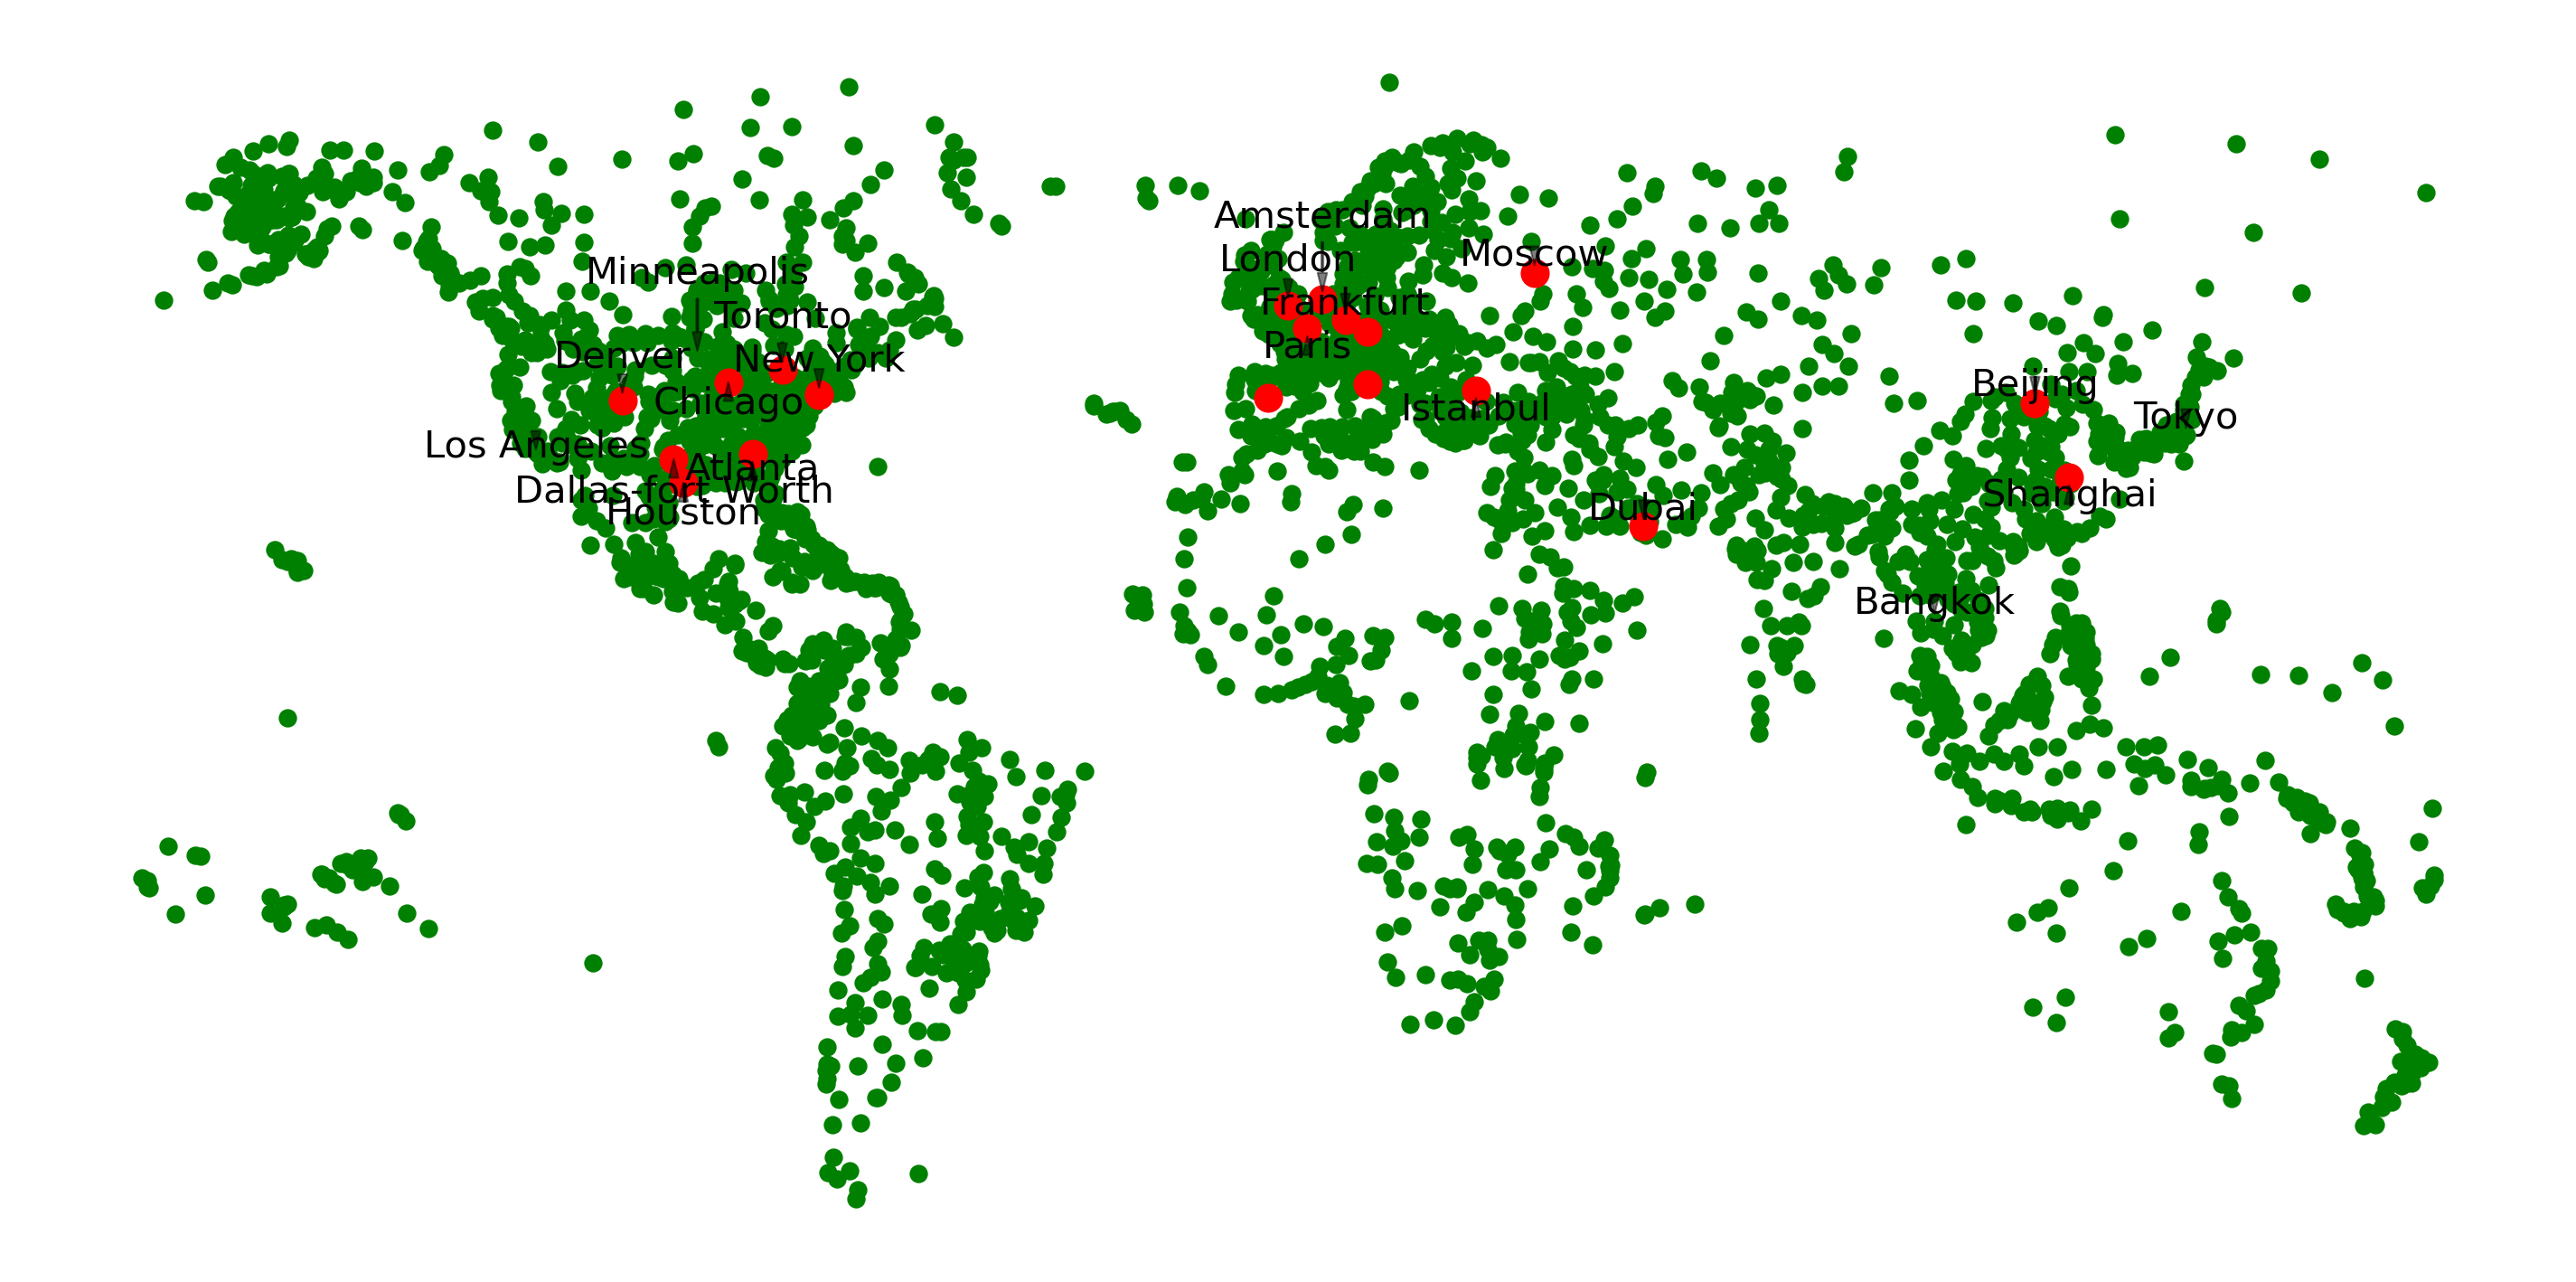

In [46]:
from adjustText import adjust_text
Top20pr=sorted(pr.values(),reverse=True)[19]
TopNodesPr=[d for d in Flights if pr[d]>=Top20pr]
f, ax = plt.subplots(dpi=300,figsize=(12,6))
network1 = nx.draw(Flights,pos=CityPos,with_labels=False, width=0, node_size=15, node_color='green',ax=ax)
network2 = nx.draw(Flights.subgraph(TopNodes),pos=CityPos,with_labels=False, width=0, node_size=45, node_color='red',ax=ax)


xdata = [CityPos[node][0] for node in TopNodesPr]
ydata = [CityPos[node][1] for node in TopNodesPr]
texts = []
for x, y, node in zip(xdata, ydata,TopNodesPr):
    texts.append(plt.text(x, y, node, horizontalalignment='center', color='k'))
adjust_text(texts, add_objects=network1, autoalign='y', expand_objects=(1.05, 1.2),
            only_move={'points':'', 'text':'y', 'objects':'y'}, force_text=0.75, force_objects=0.1,
            arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='k', lw=0.5, alpha=0.5))
plt.show()

In [43]:
#compare with top degree airports
TopNodes

['London',
 'Chicago',
 'Paris',
 'Moscow',
 'Shanghai',
 'Beijing',
 'Denver',
 'New York',
 'Frankfurt',
 'Houston',
 'Newark',
 'Amsterdam',
 'Madrid',
 'Istanbul',
 'Atlanta',
 'Rome',
 'Munich',
 'Toronto',
 'Dubai',
 'Dallas-fort Worth']

In [47]:
TopNodesPr #top pagerank

['London',
 'Chicago',
 'Paris',
 'Moscow',
 'Shanghai',
 'Beijing',
 'Denver',
 'Los Angeles',
 'New York',
 'Frankfurt',
 'Houston',
 'Tokyo',
 'Amsterdam',
 'Istanbul',
 'Bangkok',
 'Atlanta',
 'Toronto',
 'Dubai',
 'Dallas-fort Worth',
 'Minneapolis']

In [48]:
#top pagerank not in top degree
set(TopNodesPr) - set(TopNodes)

{'Bangkok', 'Los Angeles', 'Minneapolis', 'Tokyo'}

In [49]:
#top degree not in top pagerank
set(TopNodes) - set(TopNodesPr)

{'Madrid', 'Munich', 'Newark', 'Rome'}